In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
data = pd.read_csv("household_power_consumption.txt", sep = ";",low_memory = False,parse_dates = {'DateTime' : ['Date', 'Time']},infer_datetime_format = True,na_values=['nan','?'], index_col='DateTime')

In [41]:
data.shape

(2075259, 7)

In [42]:
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [44]:
data.head(20)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0


In [3]:
nul = data.isna().sum()
nul

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [4]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [50]:
(100)*nul/data.shape[0]

Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
dtype: float64

In [5]:
data.fillna(data.mean(), inplace = True)
data.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [61]:
data.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Text(0.5, 1.0, 'DateTime VS Global_active_power')

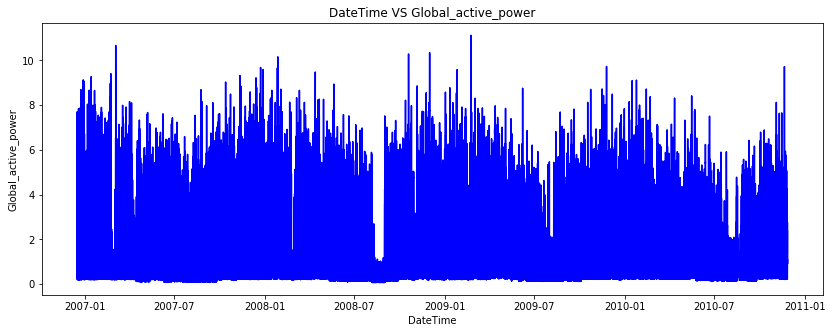

In [27]:
plt.figure(figsize=(14,5))
plt.plot(data.index , "Global_active_power", data = data, color = "blue")
plt.xlabel("DateTime")
plt.ylabel("Global_active_power")
plt.title("DateTime VS Global_active_power")

Text(0.5, 1.0, 'DateTime VS Global_reactive_power')

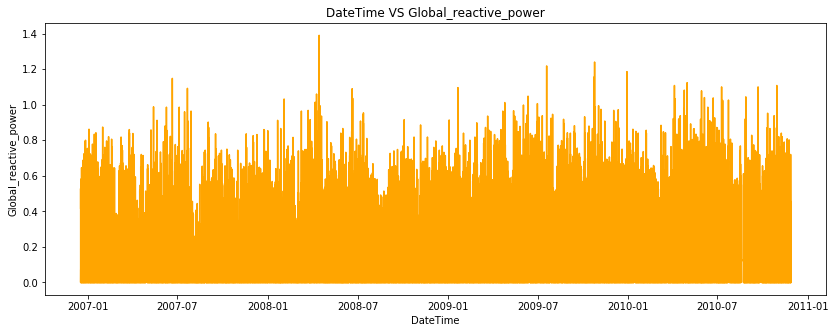

In [28]:
plt.figure(figsize=(14,5))
plt.plot(data.index , "Global_reactive_power", data = data, color = "orange")
plt.xlabel("DateTime")
plt.ylabel("Global_reactive_power")
plt.title("DateTime VS Global_reactive_power")

Text(0.5, 1.0, 'DateTime VS Global_intensity')

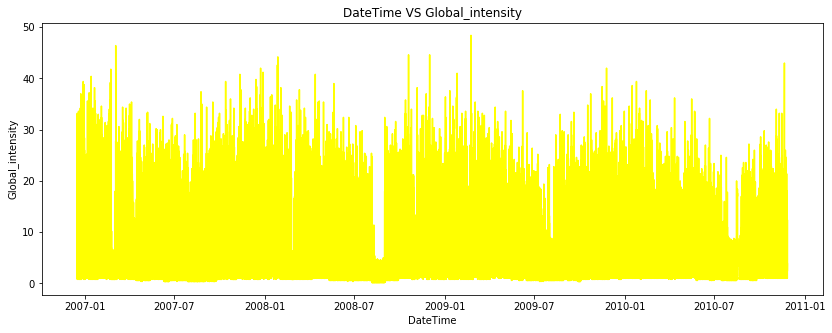

In [29]:
plt.figure(figsize=(14,5))
plt.plot(data.index , "Global_intensity", data = data, color = "yellow")
plt.xlabel("DateTime")
plt.ylabel("Global_intensity")
plt.title("DateTime VS Global_intensity")

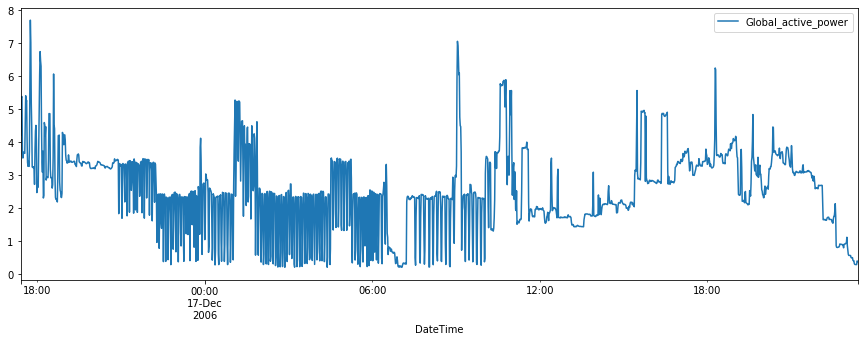

In [67]:
data.iloc[0:1800].plot(y = "Global_active_power", figsize=(15,5))

In [6]:
import datetime as dt

In [59]:
# def week(val):
#     weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
#     fin = val.weekday()
#     return weekDays[fin]

In [7]:
data.sort_values(by='DateTime')
data_mon = data.groupby(data.index.to_series().apply(lambda x: dt.datetime.strftime(x, '%m'))).mean()
data_mon

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
01,1.455719,0.110949,242.154158,6.112199,1.401485,1.544444,7.770605
02,1.300340,0.099672,241.459095,5.446741,1.132139,1.386530,7.586840
03,1.229753,0.111398,241.520813,5.170552,1.265074,1.657568,6.923147
04,1.048105,0.122799,241.040326,4.428397,1.076622,1.175945,6.673473
05,1.029573,0.127903,239.008586,4.403170,1.234912,1.307813,6.696831
06,0.912686,0.145817,239.930387,3.940274,1.326786,1.245459,6.177658
07,0.700661,0.151867,240.004303,3.063528,0.707957,0.992469,4.277454
08,0.596466,0.138728,240.204213,2.610936,0.536400,0.827432,3.975908
09,0.979170,0.132597,240.464033,4.183684,1.154891,1.188228,6.359492


Text(0.5, 0, 'Months')

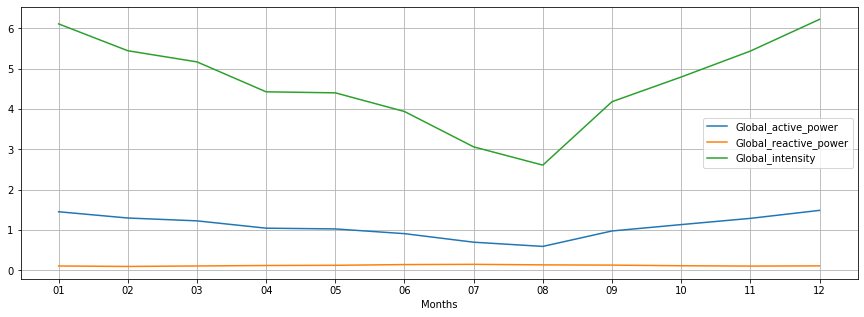

In [137]:
plt.figure(figsize = (15,5)) 
plt.grid()
plt.plot(data_mon.index,"Global_active_power", data = data_mon)
plt.plot(data_mon.index,"Global_reactive_power", data = data_mon)
plt.plot(data_mon.index,"Global_intensity", data = data_mon)
plt.legend()
plt.xlabel("Months")

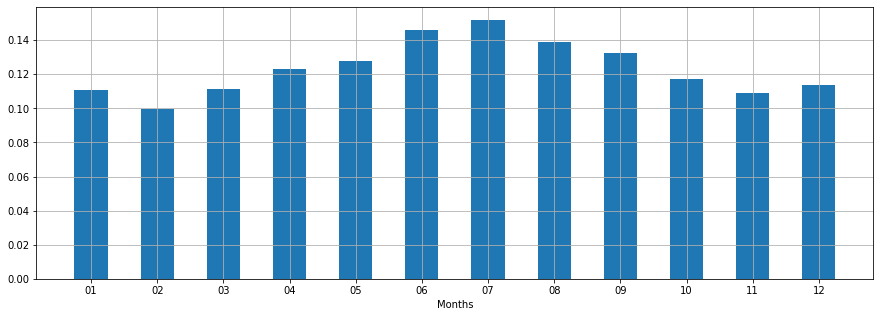

In [139]:
plt.figure(figsize = (15,5)) 
plt.bar(data_mon.index,"Global_reactive_power", data = data_mon, width = 0.5)
plt.xlabel("Months")
plt.grid()

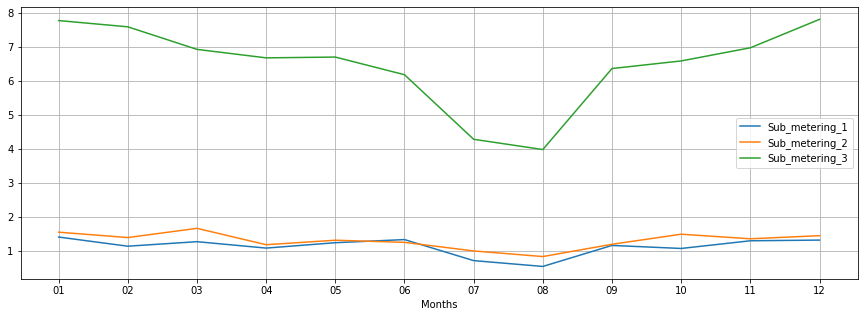

In [138]:
plt.figure(figsize = (15,5)) 
plt.plot(data_mon.index,"Sub_metering_1", data = data_mon)
plt.plot(data_mon.index,"Sub_metering_2", data = data_mon)
plt.plot(data_mon.index,"Sub_metering_3", data = data_mon)
plt.legend()
plt.xlabel("Months")
plt.grid()

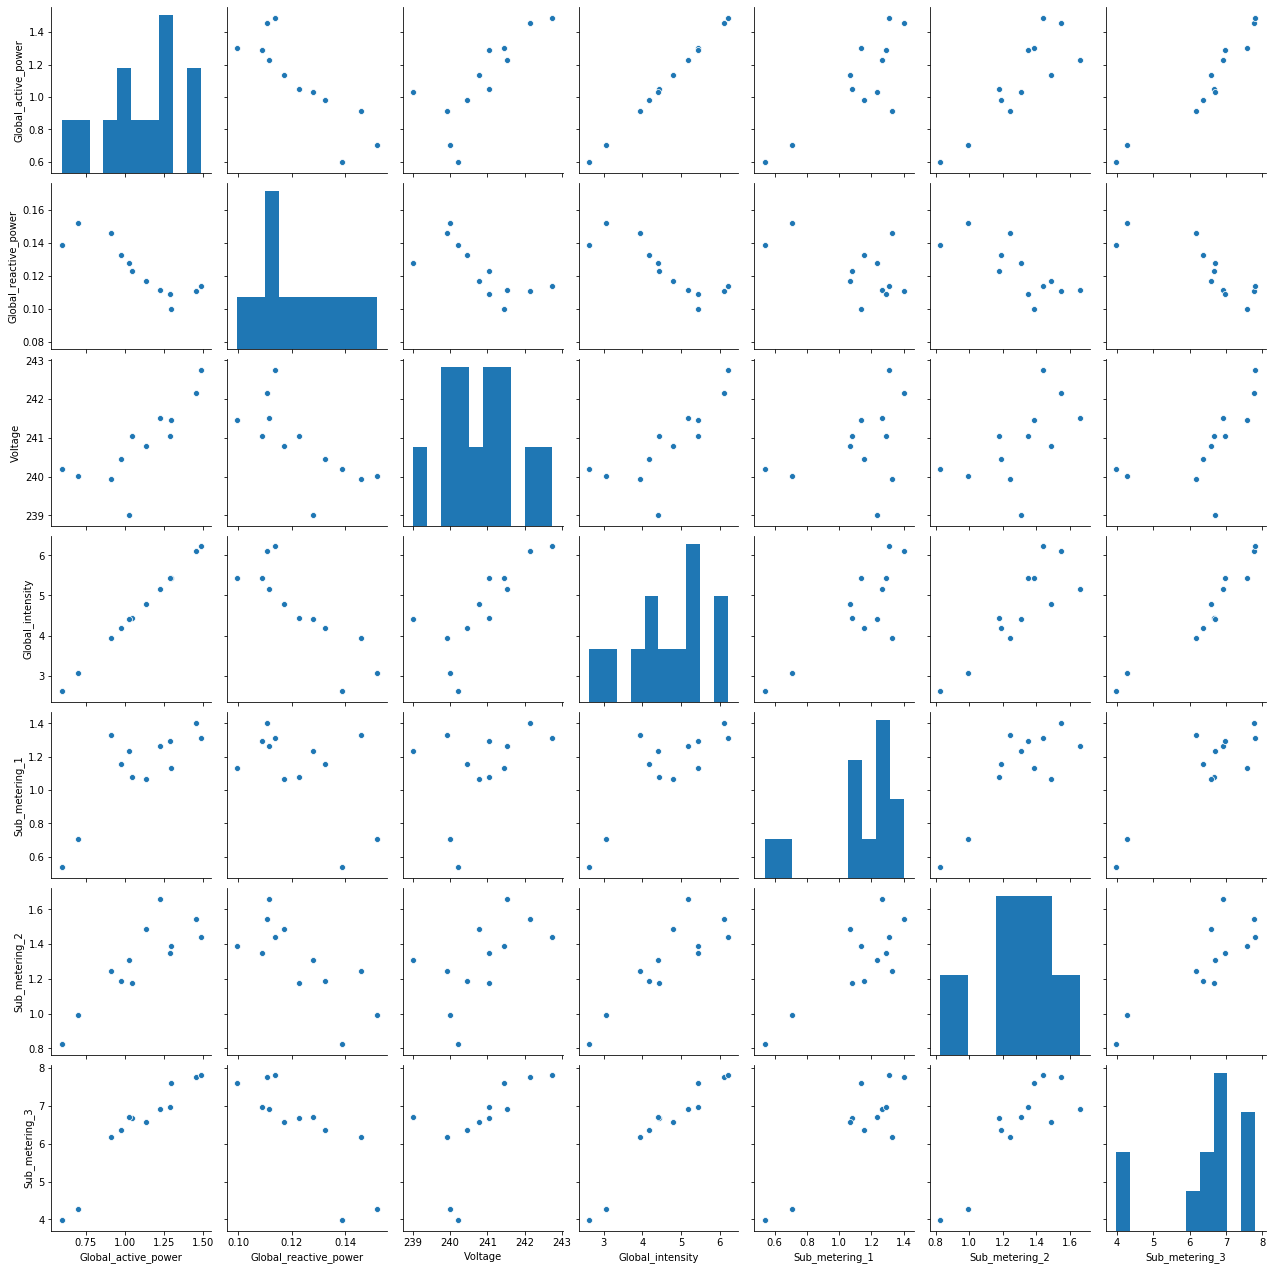

In [7]:
sns.pairplot(data_mon)

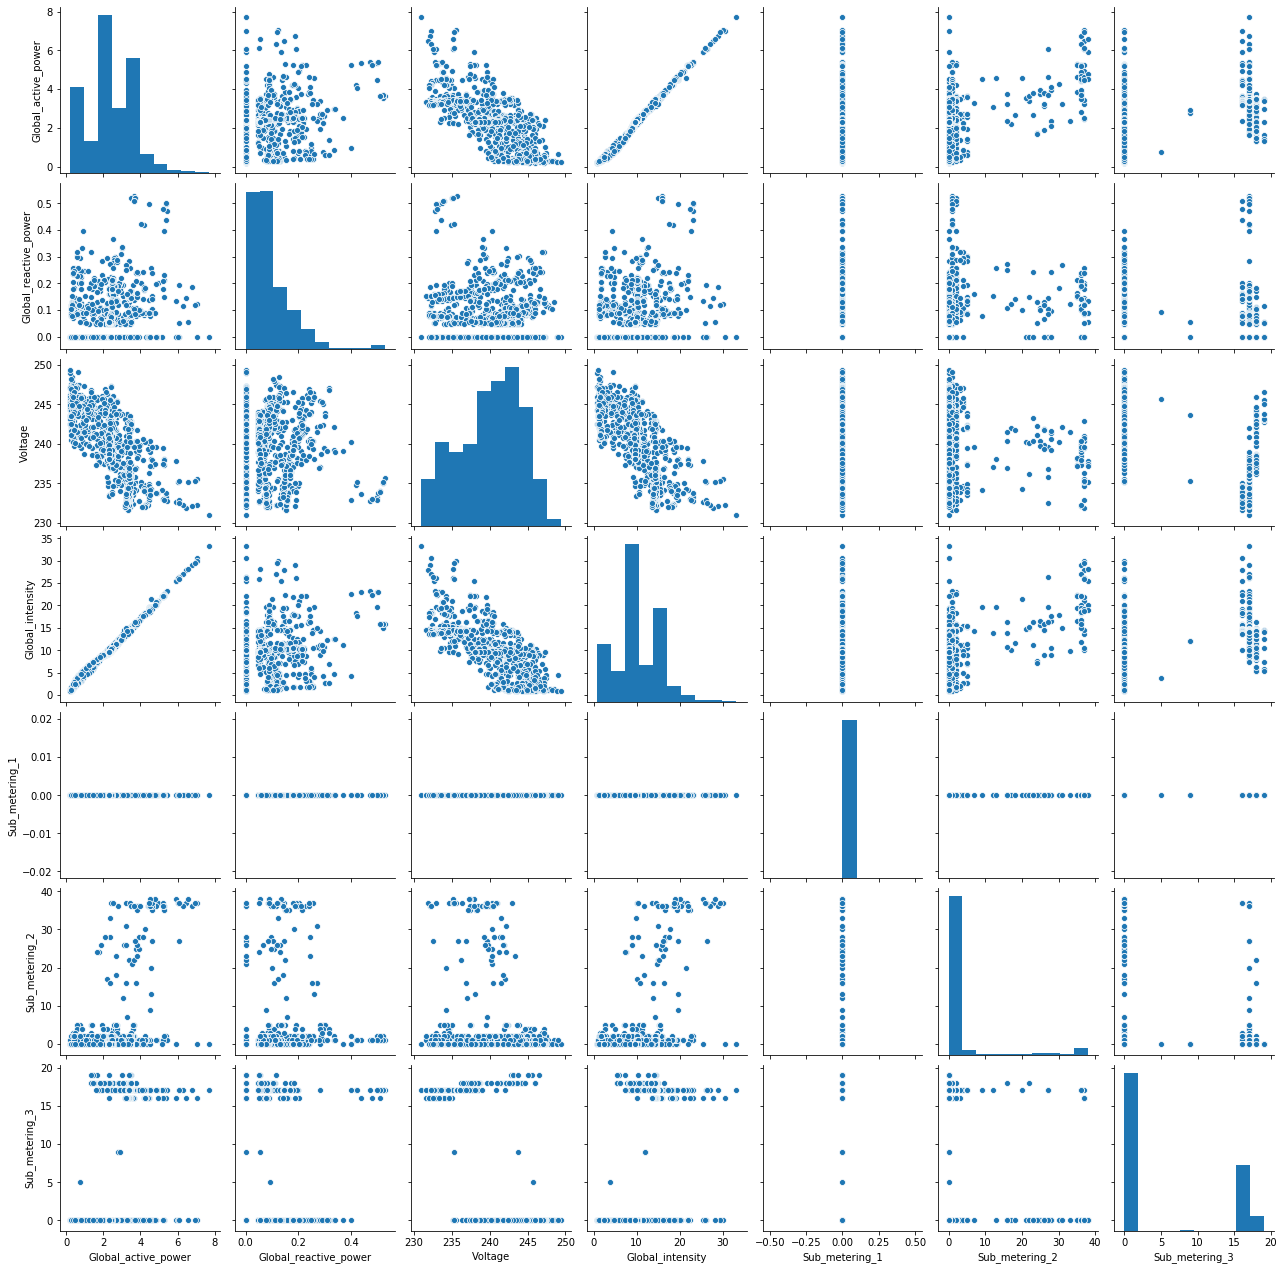

In [8]:
sns.pairplot(data[0:1000])

In [8]:
data["week"] = data.index.weekday

In [16]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,week
DateTime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,5
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,5
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,5
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,5
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,5
...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,4
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,4
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,4


In [9]:
data_wek = data.groupby(data["week"]).mean()
data_wek

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
week,,,,,,,
0,1.000406,0.115887,241.002534,4.238200,0.835073,0.882209,6.226537
1,1.069936,0.118403,240.841784,4.535728,0.788521,1.343326,6.412937
2,1.082678,0.119982,240.883603,4.586451,1.059407,1.729945,6.385132
3,0.983098,0.114513,240.854830,4.163928,0.803319,0.764976,6.035620
4,1.043630,0.118608,240.835637,4.418137,0.875926,0.999510,6.757581
5,1.244744,0.141877,240.599262,5.281044,1.712621,1.487767,7.468823
6,1.217322,0.136792,240.860507,5.173000,1.780529,1.882395,5.926237


Text(0.5, 0, 'Week Days')

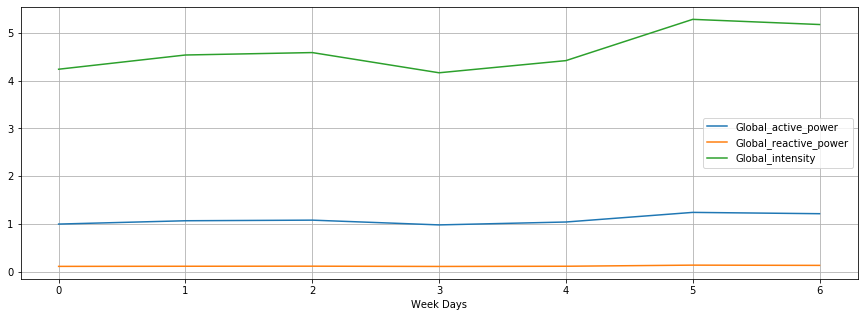

In [20]:
plt.figure(figsize = (15,5)) 
plt.grid()
plt.plot(data_wek.index,"Global_active_power", data = data_wek)
plt.plot(data_wek.index,"Global_reactive_power", data = data_wek)
plt.plot(data_wek.index,"Global_intensity", data = data_wek)
plt.legend()
plt.xlabel("Week Days")

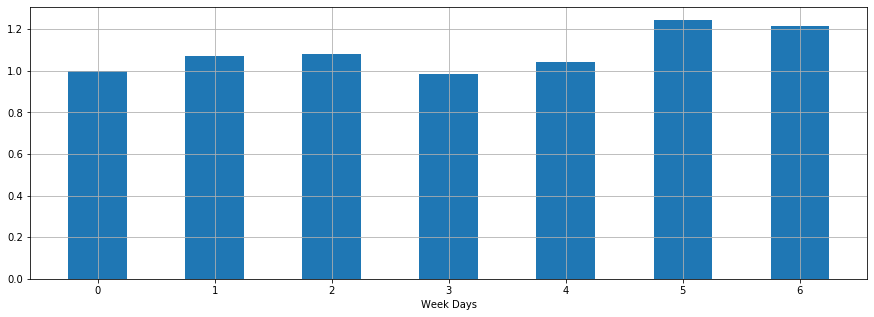

In [21]:
plt.figure(figsize = (15,5)) 
plt.bar(data_wek.index,"Global_active_power", data = data_wek, width = 0.5)
plt.xlabel("Week Days")
plt.grid()

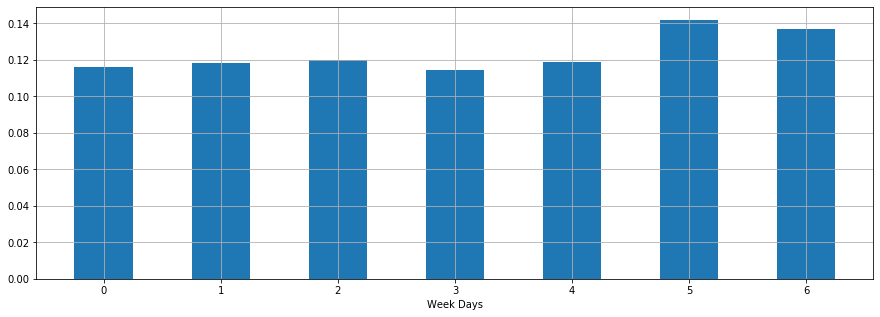

In [26]:
plt.figure(figsize = (15,5)) 
plt.bar(data_wek.index,"Global_reactive_power", data = data_wek, width = 0.5)
plt.xlabel("Week Days")
plt.grid()

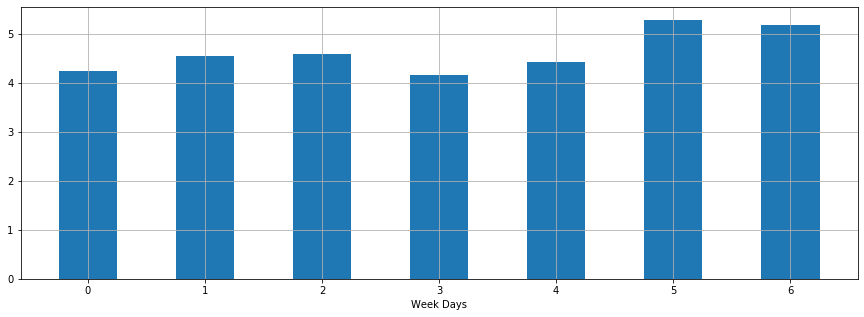

In [27]:
plt.figure(figsize = (15,5)) 
plt.bar(data_wek.index,"Global_intensity", data = data_wek, width = 0.5)
plt.xlabel("Week Days")
plt.grid()

In [10]:
data['year'] = data.index.year

In [11]:
data_yr  = data.groupby(data['year']).mean()

Text(0.5, 0, 'Year')

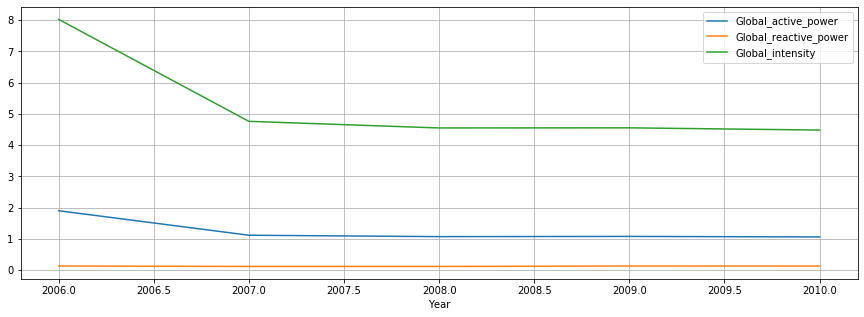

In [36]:
plt.figure(figsize = (15,5)) 
plt.grid()
plt.plot(data_yr.index,"Global_active_power", data = data_yr)
plt.plot(data_yr.index,"Global_reactive_power", data = data_yr)
plt.plot(data_yr.index,"Global_intensity", data = data_yr)
plt.legend()
plt.xlabel("Year")

In [12]:
data['Mon'] = data.index.month

In [ ]:
# plt.figure(figsize = (15,5)) 
# plt.grid()
# plt.plot("Mon","Global_active_power", data = data)
# # plt.plot(data['Mon'],"Global_reactive_power", data = data)
# # plt.plot(data['Mon'],"Global_intensity", data = data)
# # plt.legend()
# plt.xlabel("Month")

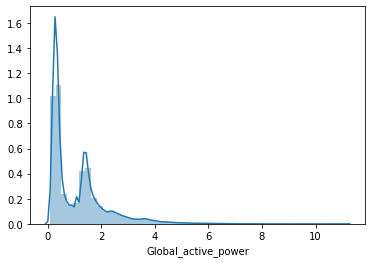

In [11]:
sns.distplot(data["Global_active_power"], bins = 50)

## Training and Testing Data

In [13]:
X = data[['Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3']]
Y = data['Global_active_power']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

## Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler 
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

In [17]:
num_col = ['Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3']

In [18]:
for i in num_col:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

## Training the Model

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_stand,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print(lm.intercept_)

1.0922186649174186


In [21]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Global_reactive_power,-0.019586
Voltage,0.014373
Global_intensity,1.053378
Sub_metering_1,-0.001879
Sub_metering_2,-0.002582
Sub_metering_3,0.018304


## Predicting Test Data

In [22]:
predictions = lm.predict(X_test_stand)

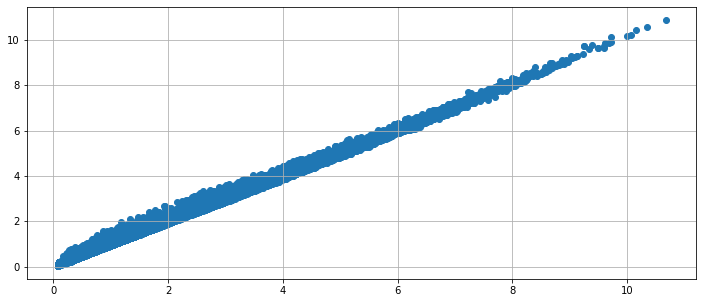

In [47]:
plt.figure(figsize = (12,5))
plt.scatter(Y_test,predictions)
plt.grid()

## Evaluating the Model

In [23]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 0.025589708774532666
MSE: 0.0016300784476853032
RMSE: 0.040374229994952264


## Residuals

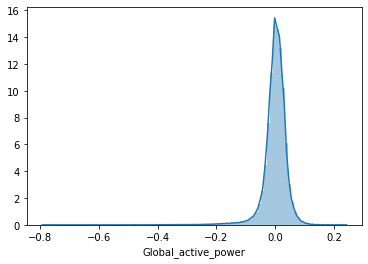

In [44]:
sns.distplot((Y_test-predictions),bins=100);